## Q1. Describe the decision tree classifier algorithm and how it works to make predictions.

- In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. 
- This algorithm compares the values of the root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.
- For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. 
- It continues the process until it reaches the leaf node of the tree. The complete algorithm can be better divided into the following steps:

Step-1: Begin the tree with the root node, says S, which contains the complete dataset.finding the root node from the features we can use gini or entropy concept.

Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).for DT we use entropy or gini who works best for it.

Step-3: Divide the S into subsets that contains possible values for the best attributes.

Step-4: Generate the decision tree node, which contains the best attribute.

Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

## Q2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification.

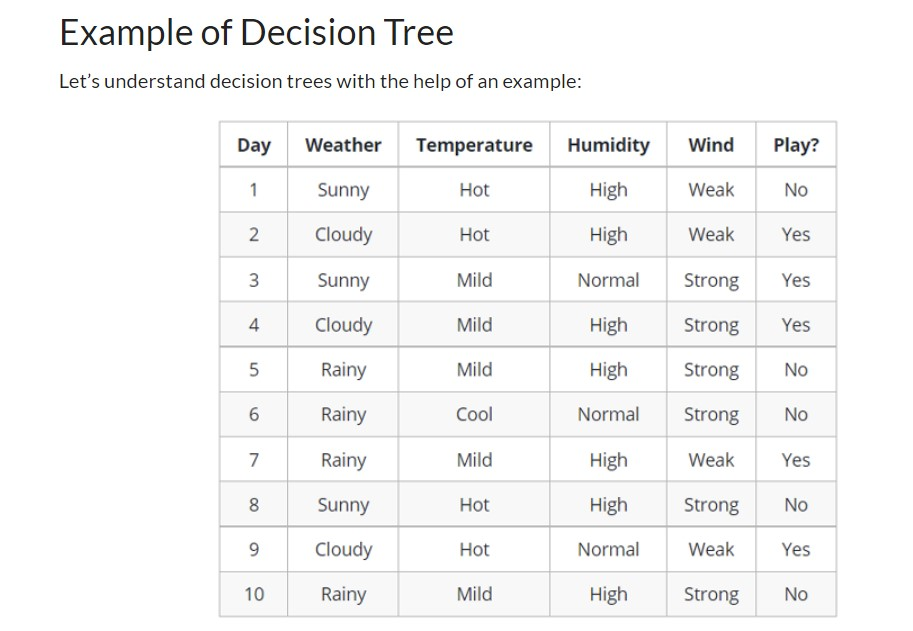

In [5]:
from IPython.display import Image
Image(filename='dt.jpg',width=400,height=400) 

In [19]:
import pandas as pd
df=pd.DataFrame({'class':['Nine','Nine','Nine','Nine','Nine','Nine','Nine','Nine','Nine','Nine','Ten','Ten','Ten','Ten','Ten','Ten','Ten','Ten','Ten','Ten'],
                'average':['aboveaverage','aboveaverage','aboveaverage','aboveaverage','aboveaverage','aboveaverage','aboveaverage','aboveaverage','aboveaverage','aboveaverage',
                          'aboveaverage','aboveaverage','aboveaverage','aboveaverage','belowaverage','belowaverage','belowaverage','belowaverage','belowaverage','belowaverage'],
                'Play Cricket':['Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','No','No','No','No','No','No',
                       'Yes','Yes','No','No','No','No']})

In [20]:
df

,class,average,Play Cricket
0,Nine,aboveaverage,Yes
1,Nine,aboveaverage,Yes
2,Nine,aboveaverage,Yes
3,Nine,aboveaverage,Yes
4,Nine,aboveaverage,Yes
5,Nine,aboveaverage,Yes
6,Nine,aboveaverage,Yes
7,Nine,aboveaverage,Yes
8,Nine,aboveaverage,No
9,Nine,aboveaverage,No


### Split the performance of the class on basis of gini impurity

In [64]:
df['average'].value_counts()

aboveaverage    14
belowaverage     6
Name: average, dtype: int64

In [58]:
col=['average','Play Cricket']
df.groupby(col).count()

class
average      Play Cricket       
aboveaverage No                6
             Yes               8
belowaverage No                4
             Yes               2

**Split on performance in Average**

- Gini Impurity:subnode of above avearge
    
    = 1-(8/14*8/14+6/14*6/14)
    
    =0.49
    
- Gini Impurity:subnode of Below avearge
    
    = 1-(4/6*4/6+2/6*2/6)
    
    = 0.44
 
-Weigheted Gini Impurity

    = 14/20*0.49+6/20*0.44
    = 0.475

**Split on performance in class**

In [65]:
df['class'].value_counts()

Nine    10
Ten     10
Name: class, dtype: int64

In [61]:
col=['class','Play Cricket']
df.groupby(col).count()

average
class Play Cricket         
Nine  No                  2
      Yes                 8
Ten   No                  8
      Yes                 2

## GINI

**Split on performance in Average**

- Gini Impurity:subnode of above avearge
    
    = 1-(8/10*8/10+2/10*2/10)
    
    =0.32
    
- Gini Impurity:subnode of Below avearge
    
      = 1-(8/10*8/10+2/10*2/10)
    
       =0.32
    
 
-Weigheted Gini Impurity

    = 10/20*0.32+10/20*0.32
    = 0.32

Split :1. class = 0.475
        2. average = 0.32
        
**Go with Average as we get low impurity at that node**
        

Step1:Choose the attribute which is qualify for root node on basis of entropy or gini.

        1. Gini Impurity = 1- Gini
        2. Information Gain = 1- Entropy

In [15]:
Image(url="https://i.pinimg.com/originals/91/d3/31/91d3314ae9bc6525ed709b08c0214255.png",width=500,height=300)

- Same steps get followed for the next  split and decided the node/feature which will give low impurity or high gain value 
- This process still goes on till we get pure node in case of full grown tree

## Q3. Explain how a decision tree classifier can be used to solve a binary classification problem.

In [131]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [132]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [126]:
df.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0


In [133]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [134]:
df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [135]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

In [136]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [144]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


In [145]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7575757575757576
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       164
           1       0.56      0.72      0.63        67

    accuracy                           0.76       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.78      0.76      0.76       231



[Text(0.5, 0.875, 'glucose <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.25, 0.625, 'bmi <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.125, 0.375, 'bmi <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.0625, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1875, 0.125, 'gini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.375, 0.375, 'age <= 27.5\ngini = 0.397\nsamples = 260\nvalue = [189, 71]'),
 Text(0.3125, 0.125, 'gini = 0.243\nsamples = 120\nvalue = [103, 17]'),
 Text(0.4375, 0.125, 'gini = 0.474\nsamples = 140\nvalue = [86, 54]'),
 Text(0.75, 0.625, 'bmi <= 27.85\ngini = 0.478\nsamples = 180\nvalue = [71, 109]'),
 Text(0.625, 0.375, 'glucose <= 145.5\ngini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(0.5625, 0.125, 'gini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.6875, 0.125, 'gini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.875, 0.375, 'glucose <= 158.5\ngini = 0.424\nsamples = 144\nvalue = [44, 1

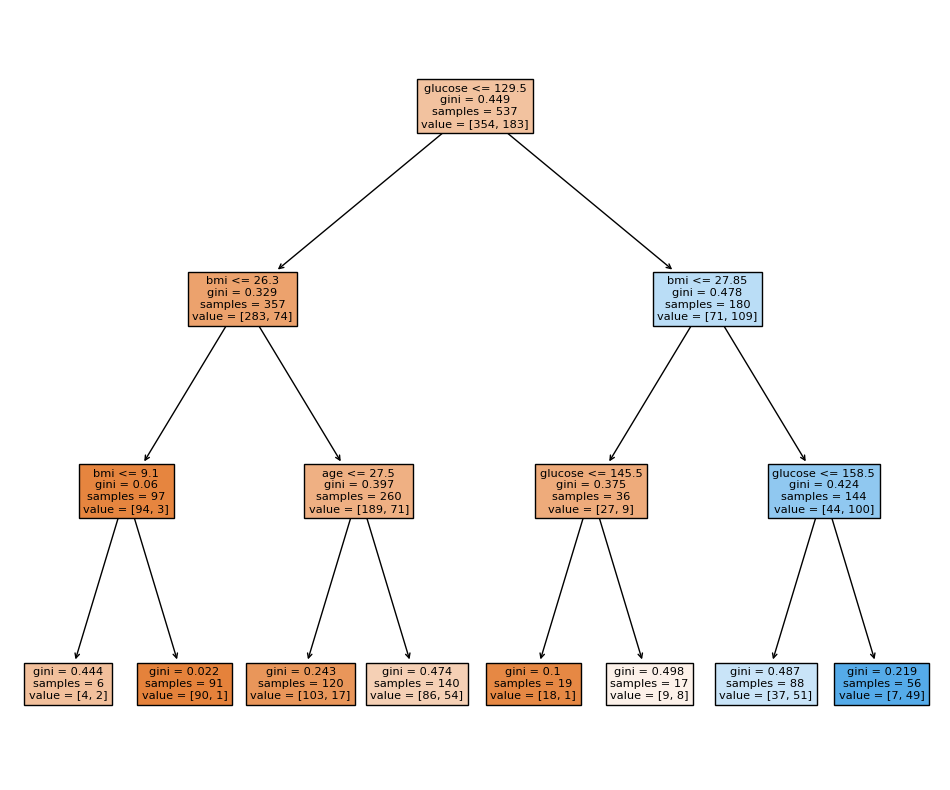

In [146]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True,feature_names=X.columns)

## Q4. Discuss the geometric intuition behind decision tree classification and how it can be used to make predictions.

- Below is the database

In [151]:
Image (url = "https://miro.medium.com/v2/resize:fit:1923/1*8Z0DMHe-ss7oeVsmVGZZWw.png",width=500,height=500)

-Tree of the data

In [150]:
Image(url="https://miro.medium.com/v2/resize:fit:1430/1*rSQIIAboJftqAv_BReNipg.png",width=500,height=500)

- Root Node: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node. 
- Splitting: It is a process of dividing a node into two or more sub-nodes. Decision Node: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node and Windy node.
- Leaf: Terminal Node that predicts the outcome (categorical or continues value). The coloured nodes, i.e., Yes and No nodes, are the leaves.
- Decision Node: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node and Windy node.

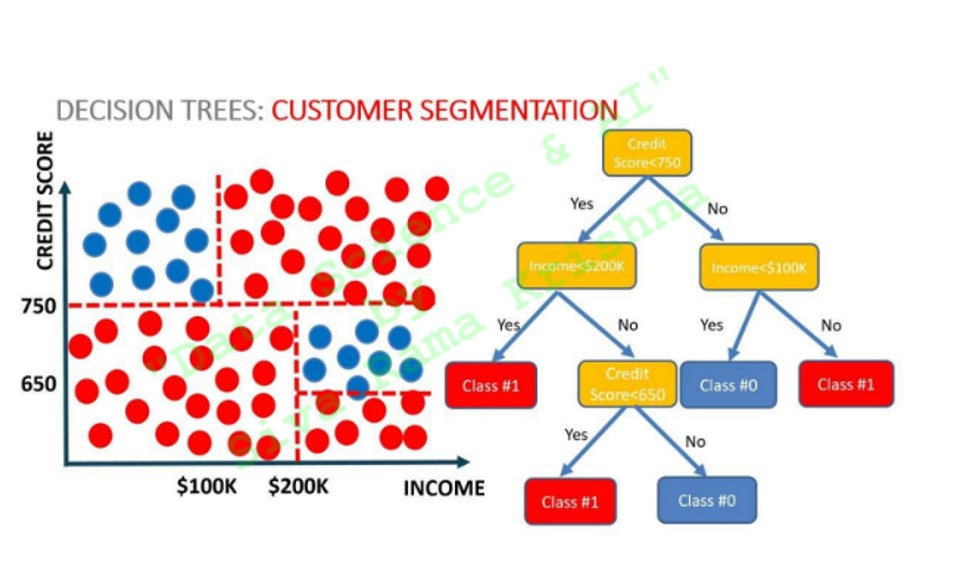

In [153]:
Image (filename ="dt1_in.jpg",width=500,height=500)

- In above diagram we can see the geomatic intution of the tree which decide the class on basis of your income and credit score

## Q5. Define the confusion matrix and describe how it can be used to evaluate the performance of a classification model.
## Q6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be calculated from it.

- In machine Learning, Classification is the process of categorizing a given set of data into different categories. In Machine Learning, To measure the performance of the classification model we use the confusion matrix.


**Confusion Matrix**:

- A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

- For binary classification, the matrix will be of a 2X2 table, For multi-class classification, the matrix shape will be equal to the number of classes i.e for n classes it will be nXn. 

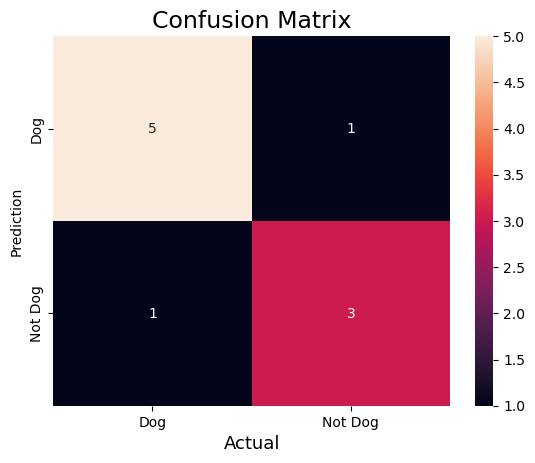

In [155]:
#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
 
#Create the NumPy array for actual and predicted labels.
actual    = np.array(
  ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
  ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])
 
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

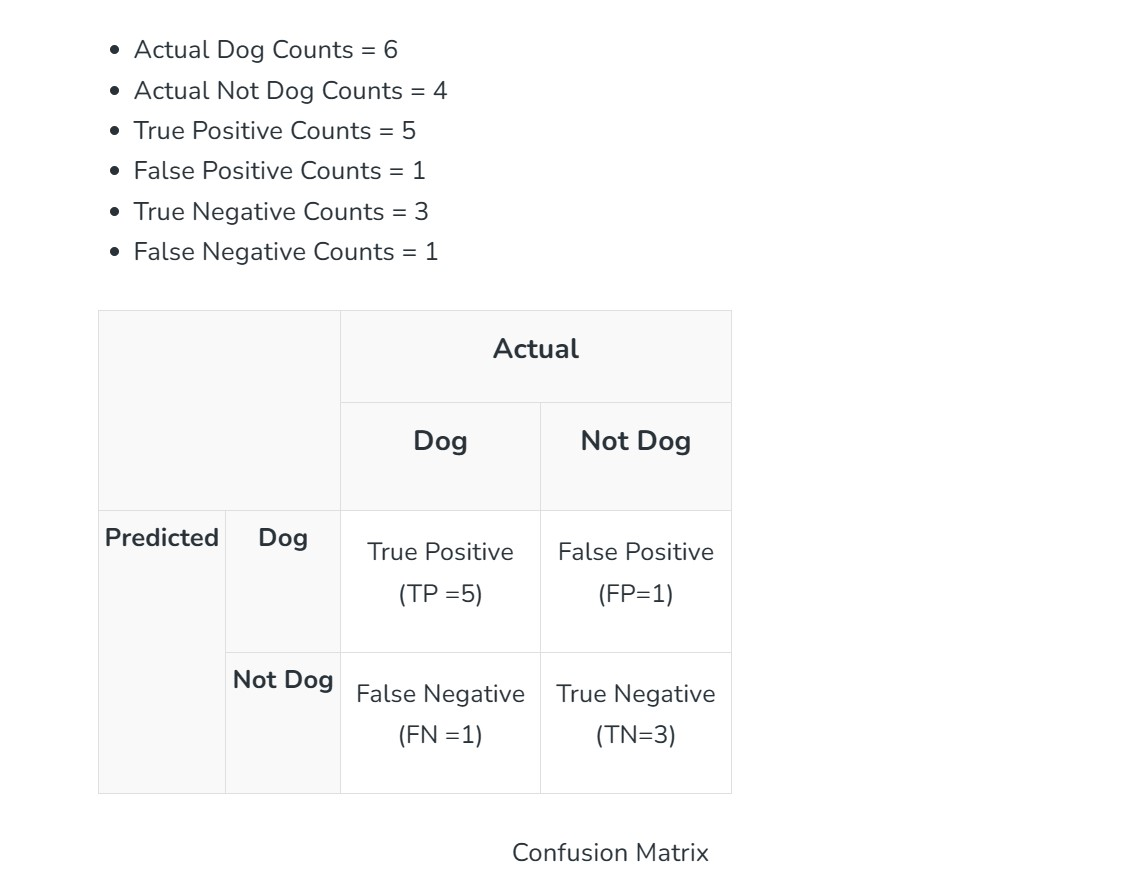

In [159]:
Image(filename='confusion matrix.jpg',width=500,height=500)

From the confusion matrix, we can find the following metrics

- Accuracy:  Accuracy is used to measure the performance of the model. It is the ratio of Total correct instances to the total instances. 

                                Accuracy = {TP+TN}/{TP+TN+FP+FN}

                                For the above case:

                                Accuracy = (5+3)/(5+3+1+1) = 8/10 = 0.8

- Precision: Precision is a measure of how accurate a model’s positive predictions are. It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model

                                    Precision = {TP}/{TP+FP}

                                    For the above case:

                                    Precision = 5/(5+1) =5/6 = 0.8333

- Recall: Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.

                                    {Recall} = {TP}/{TP+FN}

                                     For the above case:

                                    Recall = 5/(5+1) =5/6 = 0.8333

- F1-Score: F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall,

                                    {F1-Score} = {2.Precision.Recall}/{Precision + Recall}

                                     For the above case:

                                       F1-Score: = (2* 0.8333* 0.8333)/( 0.8333+ 0.8333)  = 0.8333

## Q7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and explain how this can be done.


- If your data is balanced, accuracy is usually a good metric to get an idea of your classifier's performance.

- When your data is not balanced or the relative risk of having false positives/false negatives is important, you need special metrics.
- Precision and recall are two popular choices used widely in different classification tasks, so a basic understanding of these concepts is important for every data scientist.

- These, of course, are not the only methods used for evaluating the performance of a classifier. Other metrics like F1 score and ROC AUC also enjoy widespread use, and they build on top of the concepts you just learned.

What are Evaluation Metrics?

- Evaluation metrics are used to measure the quality of the statistical or machine learning model. Evaluating machine learning models or algorithms is essential for any project. 

There are many different types of evaluation metrics available to test a model. These include classification accuracy, logarithmic loss, confusion matrix, and others.

- Classification accuracy: is the ratio of the number of correct predictions to the total number of input samples, which is usually what we refer to when we use the term accuracy.
- Logarithmic loss: also called log loss, works by penalizing the false classifications.

- A confusion matrix: gives us a matrix as output and describes the complete performance of the model. There are other evaluation metrics that can be used that have not been listed. Evaluation metrics involves using a combination of these individual evaluation metrics to test a model or algorithm. 

**Why is this Useful?**

It is very important to use multiple evaluation metrics to evaluate your model. This is because a model may perform well using one measurement from one evaluation metric, but may perform poorly using another measurement from another evaluation metric. Using evaluation metrics are critical in ensuring that your model is operating correctly and optimally. 

- Applications of Evaluation Metrics

1. Statistical Analysis

2. Machine Learning

## Q9. Provide an example of a classification problem where recall is the most important metric, and explain why.

- In these COVID times, people are often traveling from one place to another.
- The airport can be a risk as passengers wait in queues, check-in for flights, visit food vendors, and use facilities such as bathrooms. Tracking COVID positive passengers at airports can help prevent the spread of the virus.

- Consider, we have a machine learning model classifying passengers as COVID positive and negative. When performing classification predictions, there are four types of outcomes that could occur:

- True Positive (TP): When you predict an observation belongs to a class and it actually does belong to that class. In this case, a passenger who is classified as COVID positive and is actually positive.

- True Negative (TN): When you predict an observation does not belong to a class and it actually does not belong to that class. In this case, a passenger who is classified as not COVID positive (negative) and is actually not COVID positive (negative).

- False Positive (FP): When you predict an observation belongs to a class and it actually does not belong to that class. In this case, a passenger who is classified as COVID positive and is actually not COVID positive (negative).

- False Negative(FN): When you predict an observation does not belong to a class and it actually does belong to that class. In this case, a passenger who is classified as not COVID positive (negative) and is actually COVID positive.

In [160]:
Image(url="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/image11-6.png",width=400,height=400)

- In some cases, we are pretty sure that we want to maximize either recall or precision at the cost of others. As in this case of labeling passengers, we really want to get the predictions right for COVID positive passengers because it is really expensive to not predict the passenger right as allowing COVID positive person to proceed will result in increasing the spread. So we are more interested in recall here.

        Precision = TP/TP+FP =True positive as covid/True positive as covid+wrongly predicted as covid+ve

- Here we can say precision is not be the big consideration as treatment is not badly affecting the patient..its just good diet,exercise and multivitamins.

        Recall = TP/TP+FN = True positive as covid/True positive as covid + wrongly predicted as covid-ve

- Reacall is gaining higher mportance as wrongly predicted patient can be dangerous to society.They can spread the virus.

## Q8. Provide an example of a classification problem where precision is the most important metric, and explain why.

Mail is spam or not spam

- the result of TP will be that spam emails are placed in the spam folder.
- the result of TN will be that important emails are received.
- the result of FP will be that important emails are placed in the spam folder.
- the result of FN will be that spam emails are received.

In case 2, which scenario do you think will have the highest cost?

- Well, since missing important emails will clearly be more of a problem than receiving spam, we can say that in this case, FP will have a higher cost than FN.